### Data:

- November, October, September data by date
- Some dates by hour

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
sns.set()

### Phân tích tiền điện theo ngày của 2 tháng 10 và 11

In [2]:
dailydata = pd.read_csv("data/dailydata.csv")
dailydata.head()

,Account No.,Account Name,Frequency,Premises,From Date,To Date,Day 1,Day 2,Day 3,Day 4,...,Day 22,Day 23,Day 24,Day 25,Day 26,Day 27,Day 28,Day 29,Day 30,Day 31
0,9307911488,PHAM HOANG TUAN,Daily,75C REDHILL RD #11-80 SINGAPORE 153075,1/11/19,30/11/19,15.07,18.84,16.62,17.49,...,14.60,13.85,17.47,16.37,12.05,11.68,8.69,9.64,14.40,NaN
1,9307911488,PHAM HOANG TUAN,Daily,75C REDHILL RD #11-80 SINGAPORE 153075,1/10/19,31/10/19,15.54,13.07,13.84,16.64,...,12.16,13.52,12.59,11.37,12.53,10.95,7.32,10.18,12.85,15.52


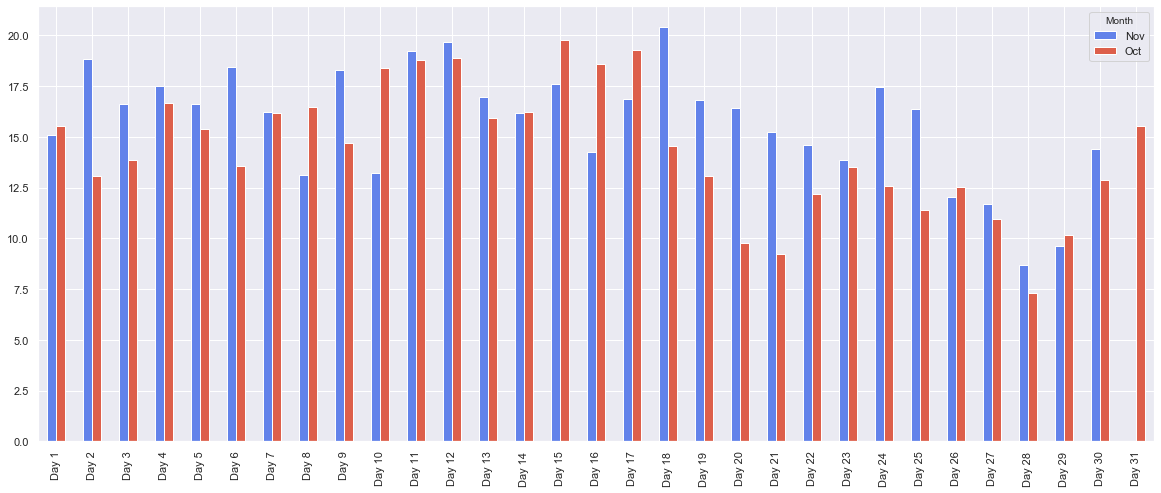

In [3]:
dailydata = dailydata.drop(columns=['Account Name', 'Account No.', 'Premises', 'Frequency'])
dailydata['Month'] = ['Nov', 'Oct']
dailydata.drop(columns=['From Date', 'To Date'], inplace=True)
dailydata.set_index('Month').T.plot(
    kind='bar',
    width=0.5,
    colormap=ListedColormap(sns.color_palette("coolwarm", 7)), 
    figsize=(20,8)
)

Lịch về VN / không ở nhà (*không tính ngày bay*)
- Tuấn: 19-21 tháng 10 | 29-30 tháng 11
- Phúc: 25-29 tháng 10
- Cảnh: 19-22 tháng 10 | 08-10 tháng 11 | 27-28 tháng 11

Thống kê chi tiết kwh từng ngày trong tháng

#### Tháng 10

In [4]:
dailydata = dailydata.set_index('Month')
octdata = dailydata[['Day 19', 'Day 20', 'Day 21', 'Day 22', 'Day 25', 'Day 26', 'Day 27', 'Day 28', 'Day 29']].loc[['Oct']]
member_df = pd.DataFrame(
    {"Day 19": "vc P", "Day 20": "vc P", "Day 21": "vc P", 
     "Day 22": " vc P, T", "Day 25": "C, T", "Day 26": "C, T", 
     "Day 27": "C, T", "Day 28": "C, T", "Day 29": "C, T" },
     index=['member']
)
octdata = octdata.append(member_df)
octdata

,Day 19,Day 20,Day 21,Day 22,Day 25,Day 26,Day 27,Day 28,Day 29
Oct,13.05,9.75,9.23,12.16,11.37,12.53,10.95,7.32,10.18
member,vc P,vc P,vc P,"vc P, T","C, T","C, T","C, T","C, T","C, T"


#### Tháng 11

In [5]:
novdata = dailydata[['Day 8', 'Day 9', 'Day 10', 'Day 27', 'Day 28', 'Day 29', 'Day 30']].loc[['Nov']]
member_df = pd.DataFrame(
    {"Day 8": "vc P, T", "Day 9": "vc P, T", "Day 10": "vc P, T", "Day 27": "vc P, T", 
     "Day 28": " vc P, T", "Day 29": "vc P, C", "Day 30": "vc P, C" },
     index=['member']
)
novdata = novdata.append(member_df)
novdata

,Day 8,Day 9,Day 10,Day 27,Day 28,Day 29,Day 30
Nov,13.14,18.29,13.23,11.68,8.69,9.64,14.4
member,"vc P, T","vc P, T","vc P, T","vc P, T","vc P, T","vc P, C","vc P, C"


Trung bình 1 ngày 4 người sử dụng tầm ~16 kwh. Nhà có có 2 người thì sẽ khoảng trên dưới 10 kwh. (các thiết bị tủ lạnh, máy giặt, máy nước nóng, đèn, tivi, bếp điện)

### Phân tích theo giờ

Dữ liệu theo giờ

In [6]:
hourlydata = pd.read_csv("data/datahourly.csv")
hourlydata.head()

,Account No.,Account Name,Frequency,Premises,From Date,To Date,0:00,0:30,1:00,1:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
0,9307911488,PHAM HOANG TUAN,Half Hourly,75C REDHILL RD #11-80 SINGAPORE 153075,1/10/19,1/10/19,0.6097,0.6902,0.5117,0.4168,...,0.1620,0.2445,0.4488,0.3704,0.4137,0.2259,0.2724,0.4147,0.8604,0.3920
1,9307911488,PHAM HOANG TUAN,Half Hourly,75C REDHILL RD #11-80 SINGAPORE 153075,2/10/19,2/10/19,0.2961,0.4189,0.4250,0.2899,...,0.2806,0.2785,0.3848,0.2827,0.2373,0.6231,0.4488,0.2703,0.3394,0.2858
2,9307911488,PHAM HOANG TUAN,Half Hourly,75C REDHILL RD #11-80 SINGAPORE 153075,3/10/19,3/10/19,0.5468,0.3281,0.2187,0.3404,...,0.4725,0.6138,0.2043,0.1867,0.2136,0.6262,0.3951,0.7985,0.7036,0.4281
3,9307911488,PHAM HOANG TUAN,Half Hourly,75C REDHILL RD #11-80 SINGAPORE 153075,4/10/19,4/10/19,0.4292,0.3116,0.3858,0.6737,...,0.1743,0.2301,0.1310,0.1310,0.5870,0.1682,0.8212,0.6035,0.8367,0.7170
4,9307911488,PHAM HOANG TUAN,Half Hourly,75C REDHILL RD #11-80 SINGAPORE 153075,5/10/19,5/10/19,0.7583,0.6974,0.5819,0.5561,...,0.0743,0.0732,0.0887,0.0691,0.1104,0.0598,0.0784,0.0825,0.0567,0.1021


In [7]:
hourlydata = hourlydata.drop(columns=['Account Name', 'Account No.', 'Premises', 'Frequency'])
hourlydata['From Date']= pd.to_datetime(hourlydata['From Date'], format='%d/%m/%y') 
hourlydata['To Date']= pd.to_datetime(hourlydata['To Date'], format='%d/%m/%y')
hourlydata['Month'] = hourlydata['From Date'].dt.month
hourlydata = hourlydata.set_index('Month')

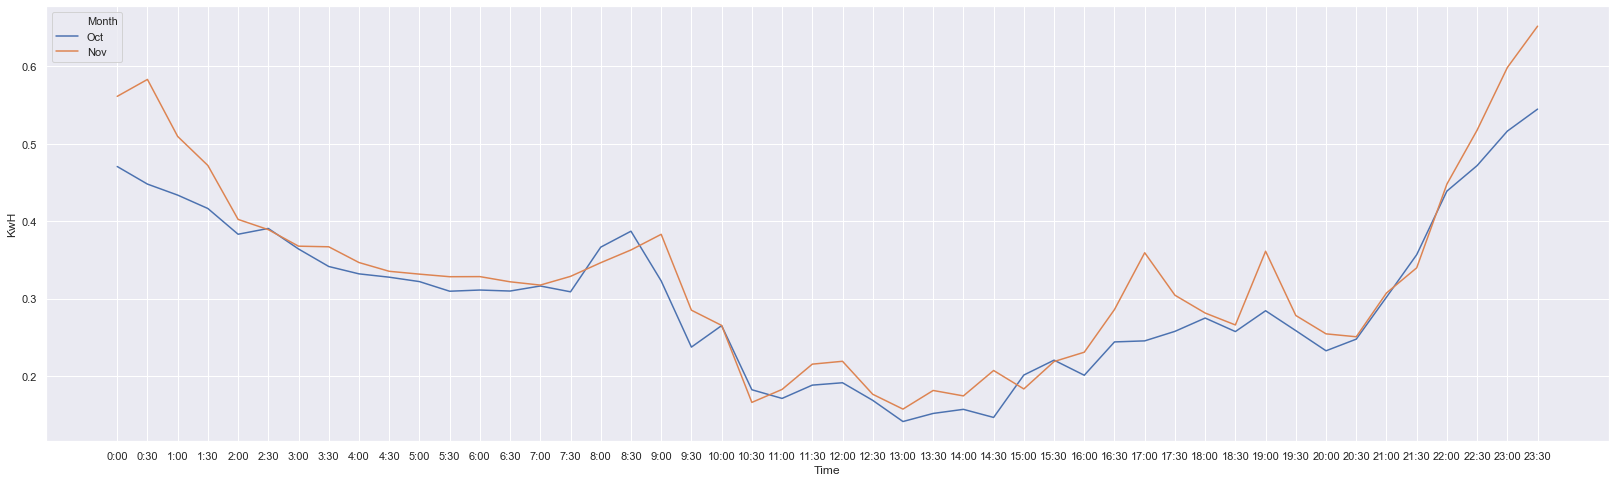

In [8]:
octhourdata_mean = pd.DataFrame(hourlydata.loc[['10']].mean()).reset_index()
octhourdata_mean['Month'] = 'Oct'
novhourdata_mean = pd.DataFrame(hourlydata.loc[['11']].mean()).reset_index()
novhourdata_mean['Month'] = 'Nov'
mean_df = octhourdata_mean.append(novhourdata_mean, ignore_index=True)
mean_df.columns = ['Time', 'KwH', 'Month']
fig, ax = plt.subplots(figsize=(28,8))
sns.lineplot(x="Time", y="KwH", hue="Month", data=mean_df, sort=False)

Tính trung bình số kwh theo thời gian mỗi ngày trong 2 tháng 10, 10

Thời điểm sử dụng nhiều nhất là 
- Từ 22pm đến 2am, dao động từ 0.4 đến 0.55 kwh. (Assumption là mọi người về nhà sử dụng máy tính, tắm rửa và giặt đồ, thường là để máy giặt qua đêm) 
- Thời điểm từ 7.30am đến 9.30am bắt đầu tăng nhẹ lên gần 0.4kwh sau đó giảm xuống lúc 10am
- Tháng 11 thì điện tăng thêm từ khoảng 16pm đến 20pm. (So với tháng 10 là tăng 0.2 kwh mỗi 30')

Chi tiết trung bình từng giờ

In [9]:
pd.DataFrame([hourlydata.loc[['10']].mean(), hourlydata.loc[['11']].mean()]).T

,0,1
0:00,0.470565,0.561187
0:30,0.447848,0.583053
1:00,0.433626,0.509433
1:30,0.416313,0.471877
2:00,0.383068,0.402250
2:30,0.390561,0.388990
3:00,0.364019,0.367647
3:30,0.341406,0.366857
4:00,0.331890,0.346533
4:30,0.327590,0.335203


Phân tích KwH theo giá trị lớn nhất mỗi ngày theo từng khung giờ trong vòng 2 tháng

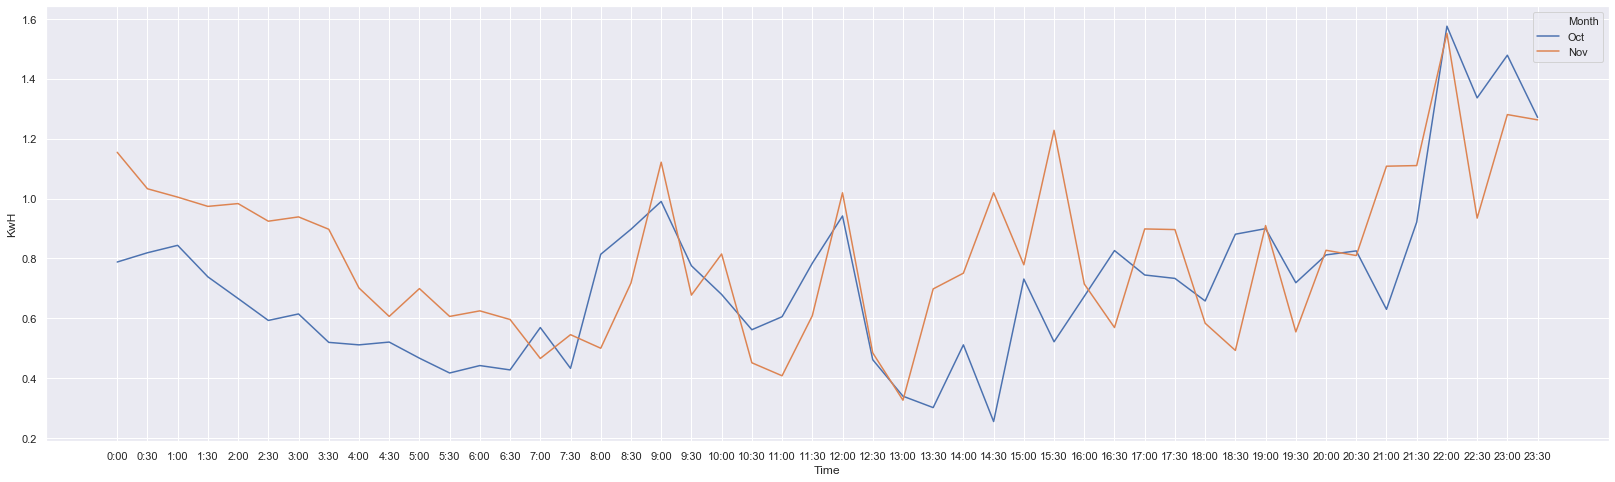

In [10]:
octhourdata_max = pd.DataFrame(hourlydata.loc[['10']].max()).reset_index().drop([0, 1])
octhourdata_max['Month'] = 'Oct'
novhourdata_max = pd.DataFrame(hourlydata.loc[['11']].max()).reset_index().drop([0, 1])
novhourdata_max['Month'] = 'Nov'
max_df = octhourdata_max.append(novhourdata_max, ignore_index=True)
max_df.columns = ['Time', 'KwH', 'Month']
max_df['KwH'] = max_df.KwH.astype(float)
fig, ax = plt.subplots(figsize=(28,8))
sns.lineplot(x="Time", y="KwH", hue="Month", data=max_df, sort=False)

Tháng 11 điện tăng nhiều hơn tháng 10. 
- Rạng sáng tăng khoảng 0.2kwh. 
- Khoảng thời gian từ 13pm đến 16pm tăng khoảng 0.4kwh, có hôm (15:30pm) tăng lên 1.1kwh so với 0.5kwh tháng 10

Chi tiết giá trị

In [11]:
pd.DataFrame([hourlydata.loc[['10']].max(), hourlydata.loc[['11']].max()]).T

,0,1
From Date,2019-10-31 00:00:00,2019-11-30 00:00:00
To Date,2019-10-31 00:00:00,2019-11-30 00:00:00
0:00,0.7882,1.1544
0:30,0.8191,1.0327
1:00,0.8439,1.0048
1:30,0.7387,0.9739
2:00,0.6664,0.9832
2:30,0.5932,0.9244
3:00,0.6149,0.9388
3:30,0.52,0.8975
